In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud

In [5]:
df = pd.read_table('SMSSpamCollection',names=['Label','Message'])
df['Label'] = df.Label.map({'ham' : 0, 'spam' : 1})     # 0 = ham, 1 = spam
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


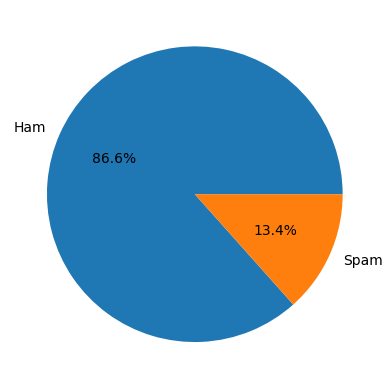

In [6]:
type_counts = df['Label'].value_counts()

plt.pie(type_counts, labels = ["Ham", "Spam"], autopct='%1.1f%%');

In [7]:
message_groups = df.groupby('Label').agg(sum)
message_groups

,Message
Label,
0,"Go until jurong point, crazy.. Available only ..."
1,Free entry in 2 a wkly comp to win FA Cup fina...


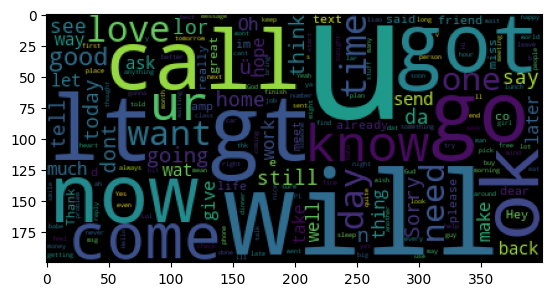

In [8]:
ham_cloud = WordCloud().generate(str(message_groups.Message[0]))
plt.imshow(ham_cloud);

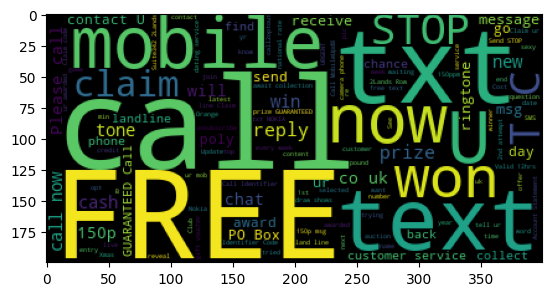

In [11]:
spam_cloud = WordCloud().generate(str(message_groups.Message[1]))
plt.imshow(spam_cloud);

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Label'])
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [13]:
vec = CountVectorizer()

train = vec.fit_transform(X_train)
test = vec.transform(X_test)

In [14]:
naive_bayes = MultinomialNB()
naive_bayes.fit(train, y_train)
predictions = naive_bayes.predict(test)

In [15]:
print('Accuracy: ', format(accuracy_score(y_test, predictions)))
print('Precision: ', format(precision_score(y_test, predictions)))
print('Recall: ', format(recall_score(y_test, predictions)))
print('F1: ', format(f1_score(y_test, predictions)))

Accuracy:  0.9863603732950467
Precision:  0.9766081871345029
Recall:  0.9175824175824175
F1:  0.9461756373937676
